# **Google Maps**
#### Lista de restaurantes - Madrid

---
## **Importamos** las librerías y 

In [ ]:
import requests
import pandas as pd
import time

# Reemplaza con tu clave real
API_KEY = 'jerome API'

radius = 500  # En metros

---
## **Llamamos** a la API de Google Maps, pasando los datos de los distritos.

In [9]:
puntos = {'centro': (40.4165, -3.7039),
 'arganzuela': (40.3989, -3.6975),
 'retiro': (40.411, -3.6767),
 'salamanca': (40.4297, -3.678),
 'chamartín': (40.4518, -3.6781),
 'tetuán': (40.4582, -3.7033),
 'chamberí': (40.4336, -3.7037),
 'fuencarral-el_pardo': (40.5021, -3.7084),
 'moncloa-aravaca': (40.4381, -3.728),
 'latina': (40.3967, -3.745),
 'carabanchel': (40.3823, -3.7409),
 'usera': (40.381, -3.7072),
 'puente_de_vallecas': (40.3851, -3.6622),
 'moratalaz': (40.4076, -3.6454),
 'ciudad_lineal': (40.4455, -3.6517),
 'hortaleza': (40.4746, -3.6457),
 'villaverde': (40.3401, -3.6921),
 'villa_de_vallecas': (40.3754, -3.6279),
 'vicálvaro': (40.4008, -3.601),
 'san_blas-canillejas': (40.4397, -3.6156),
 'barajas': (40.4719, -3.5795)}

# Lista para guardar todos los datos de todas las zonas
todos_los_datos = []

# Recorremos las zonas
for zona, (lat, lon) in puntos.items():
    print(f'Buscando en zona: {zona}')
    location = f"{lat},{lon}"
    datos = []
    pag_token = None
    intentos = 0

    while intentos < 3:
        if pag_token:
            url = f'https://maps.googleapis.com/maps/api/place/nearbysearch/json?pagetoken={pag_token}&key={API_KEY}'
        else:
            url = f'https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={location}&radius={radius}&type=restaurant&key={API_KEY}'

        response = requests.get(url)
        data = response.json()

        restaurantes = data.get('results', [])

        for r in restaurantes:
            datos.append({
                'zona': zona,
                'nombre': r.get('name'),
                'direccion': r.get('vicinity'),
                'latitud': r.get('geometry', {}).get('location', {}).get('lat'),
                'longitud': r.get('geometry', {}).get('location', {}).get('lng'),
                'rating': r.get('rating'),
                'usuarios': r.get('user_ratings_total'),
                'precio': r.get('price_level'),
                'tipos': ', '.join(r.get('types', []))
            })

        pag_token = data.get('next_page_token')
        if not pag_token:
            break

        intentos += 1
        time.sleep(3)

    # Añadir los datos de esta zona al total
    todos_los_datos.extend(datos)

# Crear DataFrame final con todos los restaurantes
df_total = pd.DataFrame(todos_los_datos)
df_total.reset_index(drop=True, inplace=True)
df_total.head()


Buscando en zona: centro
Buscando en zona: arganzuela
Buscando en zona: retiro
Buscando en zona: salamanca
Buscando en zona: chamartín
Buscando en zona: tetuán
Buscando en zona: chamberí
Buscando en zona: fuencarral-el_pardo
Buscando en zona: moncloa-aravaca
Buscando en zona: latina
Buscando en zona: carabanchel
Buscando en zona: usera
Buscando en zona: puente_de_vallecas
Buscando en zona: moratalaz
Buscando en zona: ciudad_lineal
Buscando en zona: hortaleza
Buscando en zona: villaverde
Buscando en zona: villa_de_vallecas
Buscando en zona: vicálvaro
Buscando en zona: san_blas-canillejas
Buscando en zona: barajas


,zona,nombre,direccion,latitud,longitud,rating,usuarios,precio,tipos
0,centro,Intelier Palacio San Martín,"Plaza de San Martín, 5, Madrid",40.418643,-3.706759,4.5,1295.0,NaN,"cafe, lodging, store, restaurant, food, point_..."
1,centro,La Capilla De La Bolsa,"Calle de la Bolsa, 12, Madrid",40.415157,-3.704982,4.4,252.0,2.0,"restaurant, food, point_of_interest, establish..."
2,centro,Petit Palace Chueca,"Calle de Hortaleza, 3, Madrid",40.420354,-3.701102,4.4,1498.0,NaN,"cafe, lodging, store, restaurant, food, point_..."
3,centro,RIBS ABADA,"Calle de la Abada, 8, Madrid",40.419323,-3.704119,4.7,20596.0,2.0,"restaurant, food, point_of_interest, establish..."
4,centro,Restaurante Ginger,"Plaza del Ángel, 12, Madrid",40.414264,-3.702353,4.1,7202.0,1.0,"restaurant, food, point_of_interest, establish..."


---
## **Limpiamos** el DataFrame

In [40]:
df_total.groupby('zona').size().sort_values(ascending=False)


zona
barajas                60
centro                 60
usera                  60
moratalaz              58
ciudad_lineal          39
puente_de_vallecas     39
fuencarral-el_pardo    37
vicálvaro              21
chamartín              20
hortaleza              20
retiro                 20
tetuán                 20
villa_de_vallecas      18
villaverde             14
latina                 13
moncloa-aravaca         1
dtype: int64

In [12]:
# Eliminar filas con NaN en la columna precio
df_filtrado = df_total.dropna(subset=['precio'])
df_filtrado

,zona,nombre,direccion,latitud,longitud,rating,usuarios,precio,tipos
1,centro,La Capilla De La Bolsa,"Calle de la Bolsa, 12, Madrid",40.415157,-3.704982,4.4,252.0,2.0,"restaurant, food, point_of_interest, establish..."
3,centro,RIBS ABADA,"Calle de la Abada, 8, Madrid",40.419323,-3.704119,4.7,20596.0,2.0,"restaurant, food, point_of_interest, establish..."
4,centro,Restaurante Ginger,"Plaza del Ángel, 12, Madrid",40.414264,-3.702353,4.1,7202.0,1.0,"restaurant, food, point_of_interest, establish..."
5,centro,La Finca de Susana,"Calle del Príncipe, 10, Madrid",40.416003,-3.700475,4.1,6076.0,1.0,"restaurant, food, point_of_interest, establish..."
6,centro,La Negra Tomasa,"Calle de Cádiz, 9, Madrid",40.415848,-3.702381,4.1,7330.0,2.0,"bar, restaurant, food, point_of_interest, esta..."
...,...,...,...,...,...,...,...,...,...
488,barajas,La Esquinita Mp,"Calle de Saturno, 64, Madrid",40.474595,-3.581139,4.4,173.0,1.0,"bar, restaurant, food, point_of_interest, esta..."
489,barajas,La Fragua,"Calle Canal de Suez, 53, Madrid",40.474953,-3.578491,4.4,151.0,1.0,"restaurant, food, point_of_interest, establish..."
490,barajas,Universo Kebab El Turco Barajas,"Calle Timón, 26, Madrid",40.473223,-3.583520,3.5,419.0,1.0,"restaurant, food, point_of_interest, establish..."
494,barajas,La Muralla,"Calle de Alar del Rey, 9, Madrid",40.470011,-3.583306,4.0,241.0,2.0,"restaurant, food, point_of_interest, establish..."


In [14]:
# Eliminar las columnas direccion y tipos
df_filtrado = df_filtrado.drop(columns=['direccion', 'tipos'])
df_filtrado

,zona,nombre,latitud,longitud,rating,usuarios,precio
1,centro,La Capilla De La Bolsa,40.415157,-3.704982,4.4,252.0,2.0
3,centro,RIBS ABADA,40.419323,-3.704119,4.7,20596.0,2.0
4,centro,Restaurante Ginger,40.414264,-3.702353,4.1,7202.0,1.0
5,centro,La Finca de Susana,40.416003,-3.700475,4.1,6076.0,1.0
6,centro,La Negra Tomasa,40.415848,-3.702381,4.1,7330.0,2.0
...,...,...,...,...,...,...,...
488,barajas,La Esquinita Mp,40.474595,-3.581139,4.4,173.0,1.0
489,barajas,La Fragua,40.474953,-3.578491,4.4,151.0,1.0
490,barajas,Universo Kebab El Turco Barajas,40.473223,-3.583520,3.5,419.0,1.0
494,barajas,La Muralla,40.470011,-3.583306,4.0,241.0,2.0


---
## **Convertimos** a GeoPandas

In [25]:
import geopandas as gpd
from shapely.geometry import Point

# Crear una nueva columna 'geometry' con puntos a partir de latitud y longitud
df_filtrado['geometry'] = df_filtrado.apply(
    lambda row: Point(row['longitud'], row['latitud']), axis=1
)

# Convertir a GeoDataFrame
gdf = gpd.GeoDataFrame(df_filtrado, geometry='geometry', crs='EPSG:4326')

# Convertimos el GeoDataFrame a Web Mercator
gdf_mercator = gdf.to_crs(epsg=3857)
gdf_mercator = gdf_mercator.drop(columns=['latitud', 'longitud'])
gdf_mercator = gdf_mercator.rename(columns={
    'zona': 'distrito',
    "nombre": "restaurante"
    })

In [32]:
# Filtramos solo restaurantes con precio 3
gdf_precio = gdf_mercator[gdf_mercator['precio'] == 3]

# Contamos cuántos hay por distrito
conteo = gdf_precio.groupby('distrito').size().sort_values(ascending=False)
# conteo
gdf_precio

,distrito,restaurante,rating,usuarios,precio,geometry
15,centro,Radio Rooftop Madrid,3.8,1336.0,3.0,POINT (-412045.355 4926407.2)
27,centro,Entre Suspiro Y Suspiro,4.5,1046.0,3.0,POINT (-412887.876 4926972.418)
31,centro,La Cabaña Argentina,4.7,9407.0,3.0,POINT (-411768.57 4926534.564)
33,centro,Restaurante Casa Gallega,4.4,2288.0,3.0,POINT (-412710.255 4926751.529)
44,centro,Las Cuevas de Luis Candelas · Restaurant,4.3,1719.0,3.0,POINT (-412774.843 4926412.42)
65,retiro,Restaurante Don Giovanni,4.2,3433.0,3.0,POINT (-409680.372 4925334.872)
81,chamartín,La Ancha,4.5,2498.0,3.0,POINT (-409373.72 4931458.289)
157,moncloa-aravaca,Café de Oriente,4.2,1987.0,3.0,POINT (-415160.486 4930066.769)
161,latina,Mesón El Molinero,4.7,840.0,3.0,POINT (-416810.541 4923859.745)
482,barajas,Asador Nuevo Porche | Restaurante Barajas,4.7,1427.0,3.0,POINT (-398811.638 4934606.762)


---
## Vamos a **recolectar** más datos de algunos distritos

In [41]:
puntos = {
 'arganzuela': (40.3989, -3.6975),
 'salamanca': (40.4297, -3.678),
 'chamberí': (40.4336, -3.7037),
 'carabanchel': (40.3823, -3.7409),
 'san_blas-canillejas': (40.4397, -3.6156)}

# Lista para guardar todos los datos de todas las zonas
todos_los_datos_parte = []

# Recorremos las zonas
for zona, (lat, lon) in puntos.items():
    print(f'Buscando en zona: {zona}')
    location = f"{lat},{lon}"
    datos = []
    pag_token = None
    intentos = 0

    while intentos < 3:
        if pag_token:
            url = f'https://maps.googleapis.com/maps/api/place/nearbysearch/json?pagetoken={pag_token}&key={API_KEY}'
        else:
            url = f'https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={location}&radius={radius}&type=restaurant&key={API_KEY}'

        response = requests.get(url)
        data = response.json()

        restaurantes = data.get('results', [])

        for r in restaurantes:
            datos.append({
                'zona': zona,
                'nombre': r.get('name'),
                'direccion': r.get('vicinity'),
                'latitud': r.get('geometry', {}).get('location', {}).get('lat'),
                'longitud': r.get('geometry', {}).get('location', {}).get('lng'),
                'rating': r.get('rating'),
                'usuarios': r.get('user_ratings_total'),
                'precio': r.get('price_level'),
                'tipos': ', '.join(r.get('types', []))
            })

        pag_token = data.get('next_page_token')
        if not pag_token:
            break

        intentos += 1
        time.sleep(3)

    # Añadir los datos de esta zona al total
    todos_los_datos_parte.extend(datos)

# Crear DataFrame final con todos los restaurantes
df_part = pd.DataFrame(todos_los_datos_parte)
df_part.reset_index(drop=True, inplace=True)
df_part.head()


Buscando en zona: arganzuela
Buscando en zona: salamanca
Buscando en zona: chamberí
Buscando en zona: carabanchel
Buscando en zona: san_blas-canillejas


,zona,nombre,direccion,latitud,longitud,rating,usuarios,precio,tipos
0,arganzuela,Domino's Pizza,"Paseo de las Delicias, 65, Madrid",40.398600,-3.694100,3.7,1816.0,1.0,"meal_delivery, meal_takeaway, restaurant, food..."
1,arganzuela,Bar Taberna Morrighan,"Paseo de Santa María de la Cabeza, 65, Madrid",40.399508,-3.700366,4.2,1537.0,1.0,"bar, restaurant, food, point_of_interest, esta..."
2,arganzuela,Restaurante Chino País Divino,"Calle de las Peñuelas, 59, Madrid",40.399495,-3.701222,3.0,160.0,1.0,"meal_delivery, meal_takeaway, restaurant, food..."
3,arganzuela,Tapería La Pequeña Graná.,"Calle de Embajadores, 124, Madrid",40.399356,-3.698587,4.3,5432.0,1.0,"bar, restaurant, food, point_of_interest, esta..."
4,arganzuela,SergivanMar | Jamonería - Quesería | Arganzuela,"Calle de Embajadores, 116, Madrid",40.399989,-3.698996,4.6,93.0,NaN,"grocery_or_supermarket, liquor_store, store, r..."


---
## **Limpiamos** el DataFrame de la nueva busqueda.

In [43]:
df_part.groupby('zona').size().sort_values(ascending=False)

zona
arganzuela             60
chamberí               60
salamanca              60
carabanchel            27
san_blas-canillejas    22
dtype: int64

In [44]:
df_combinado = pd.concat([df_total, df_part], ignore_index=True)


---
## **Convertimos** a GeoPandas la nueva busqueda

In [45]:
import geopandas as gpd
from shapely.geometry import Point

# Eliminar filas con NaN en la columna precio
df_comb_filtrado = df_combinado.dropna(subset=['precio'])

# Eliminar las columnas direccion y tipos
df_comb_filtrado = df_comb_filtrado.drop(columns=['direccion', 'tipos'])


# Crear una nueva columna 'geometry' con puntos a partir de latitud y longitud
df_comb_filtrado['geometry'] = df_comb_filtrado.apply(
    lambda row: Point(row['longitud'], row['latitud']), axis=1
)

# Convertir a GeoDataFrame
gdf_comb = gpd.GeoDataFrame(df_comb_filtrado, geometry='geometry', crs='EPSG:4326')

# Convertimos el GeoDataFrame a Web Mercator
gdf_comb_mercator = gdf_comb.to_crs(epsg=3857)
gdf_comb_mercator = gdf_comb_mercator.drop(columns=['latitud', 'longitud'])
gdf_comb_mercator = gdf_comb_mercator.rename(columns={
    'zona': 'distrito',
    "nombre": "restaurante"
    })

In [46]:
# Filtramos solo restaurantes con precio 3
gdf_comb_precio = gdf_comb_mercator[gdf_comb_mercator['precio'] == 3]

# Contamos cuántos hay por distrito
conteo_comb = gdf_comb_precio.groupby('distrito').size().sort_values(ascending=False)
# conteo
gdf_comb_precio

,distrito,restaurante,rating,usuarios,precio,geometry
15,centro,Radio Rooftop Madrid,3.8,1336.0,3.0,POINT (-412045.355 4926407.2)
27,centro,Entre Suspiro Y Suspiro,4.5,1046.0,3.0,POINT (-412887.876 4926972.418)
31,centro,La Cabaña Argentina,4.7,9407.0,3.0,POINT (-411768.57 4926534.564)
33,centro,Restaurante Casa Gallega,4.4,2288.0,3.0,POINT (-412710.255 4926751.529)
44,centro,Las Cuevas de Luis Candelas · Restaurant,4.3,1719.0,3.0,POINT (-412774.843 4926412.42)
65,retiro,Restaurante Don Giovanni,4.2,3433.0,3.0,POINT (-409680.372 4925334.872)
81,chamartín,La Ancha,4.5,2498.0,3.0,POINT (-409373.72 4931458.289)
157,moncloa-aravaca,Café de Oriente,4.2,1987.0,3.0,POINT (-415160.486 4930066.769)
161,latina,Mesón El Molinero,4.7,840.0,3.0,POINT (-416810.541 4923859.745)
482,barajas,Asador Nuevo Porche | Restaurante Barajas,4.7,1427.0,3.0,POINT (-398811.638 4934606.762)


---
## Por último, **realizamos** una tercera busqueda.

In [48]:
puntos = {
'moncloa-aravaca': (40.457749, -3.7827941)}

radius = 2000  # En metros

# Lista para guardar todos los datos de todas las zonas
aravaca = []

# Recorremos las zonas
for zona, (lat, lon) in puntos.items():
    print(f'Buscando en zona: {zona}')
    location = f"{lat},{lon}"
    datos = []
    pag_token = None
    intentos = 0

    while intentos < 3:
        if pag_token:
            url = f'https://maps.googleapis.com/maps/api/place/nearbysearch/json?pagetoken={pag_token}&key={API_KEY}'
        else:
            url = f'https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={location}&radius={radius}&type=restaurant&key={API_KEY}'

        response = requests.get(url)
        data = response.json()

        restaurantes = data.get('results', [])

        for r in restaurantes:
            datos.append({
                'zona': zona,
                'nombre': r.get('name'),
                'direccion': r.get('vicinity'),
                'latitud': r.get('geometry', {}).get('location', {}).get('lat'),
                'longitud': r.get('geometry', {}).get('location', {}).get('lng'),
                'rating': r.get('rating'),
                'usuarios': r.get('user_ratings_total'),
                'precio': r.get('price_level'),
                'tipos': ', '.join(r.get('types', []))
            })

        pag_token = data.get('next_page_token')
        if not pag_token:
            break

        intentos += 1
        time.sleep(3)

    # Añadir los datos de esta zona al total
    aravaca.extend(datos)

# Crear DataFrame final con todos los restaurantes
df_aravaca = pd.DataFrame(aravaca)
df_aravaca.reset_index(drop=True, inplace=True)
df_aravaca.head()


Buscando en zona: moncloa-aravaca


,zona,nombre,direccion,latitud,longitud,rating,usuarios,precio,tipos
0,moncloa-aravaca,Restaurante El Nuevo Zaguán,"Avenida de la Osa Mayor, 70, Madrid",40.459040,-3.783220,4.2,958.0,2.0,"restaurant, food, point_of_interest, establish..."
1,moncloa-aravaca,La Española Restaurant,"Avenida de Juan XXIII, 5, Pozuelo de Alarcón",40.448899,-3.801273,4.3,2784.0,3.0,"restaurant, grocery_or_supermarket, store, foo..."
2,moncloa-aravaca,Santa Teresa Shop Aravaca,"Avenida de la Osa Mayor, 92, Madrid",40.459287,-3.784995,3.9,605.0,NaN,"cafe, store, restaurant, food, point_of_intere..."
3,moncloa-aravaca,EL NUEVO CHAVI,"Avenida de la Osa Mayor, 42, Madrid",40.459400,-3.779913,4.1,355.0,1.0,"liquor_store, bar, store, restaurant, food, po..."
4,moncloa-aravaca,Dorrius,"Calle Aldebarán, 3, Madrid",40.458958,-3.781058,5.0,2.0,NaN,"grocery_or_supermarket, liquor_store, store, r..."


---
## **Unimos** los Dataframes y los convertimos a GPD

In [49]:
df_comb2 = pd.concat([df_combinado, df_aravaca], ignore_index=True)

In [50]:
import geopandas as gpd
from shapely.geometry import Point

# Eliminar filas con NaN en la columna precio
df_comb2_filtrado = df_comb2.dropna(subset=['precio'])

# Eliminar las columnas direccion y tipos
df_comb2_filtrado = df_comb2_filtrado.drop(columns=['direccion', 'tipos'])


# Crear una nueva columna 'geometry' con puntos a partir de latitud y longitud
df_comb2_filtrado['geometry'] = df_comb2_filtrado.apply(
    lambda row: Point(row['longitud'], row['latitud']), axis=1
)

# Convertir a GeoDataFrame
gdf_comb2 = gpd.GeoDataFrame(df_comb2_filtrado, geometry='geometry', crs='EPSG:4326')

# Convertimos el GeoDataFrame a Web Mercator
gdf_comb2_mercator = gdf_comb2.to_crs(epsg=3857)
gdf_comb2_mercator = gdf_comb2_mercator.drop(columns=['latitud', 'longitud'])
gdf_comb2_mercator = gdf_comb2_mercator.rename(columns={
    'zona': 'distrito',
    "nombre": "restaurante"
    })

In [51]:
# Filtramos solo restaurantes con precio 3
gdf_comb2_precio = gdf_comb2_mercator[gdf_comb2_mercator['precio'] == 3]

# Contamos cuántos hay por distrito
conteo_comb2 = gdf_comb2_precio.groupby('distrito').size().sort_values(ascending=False)
# conteo
gdf_comb2_precio

,distrito,restaurante,rating,usuarios,precio,geometry
15,centro,Radio Rooftop Madrid,3.8,1336.0,3.0,POINT (-412045.355 4926407.2)
27,centro,Entre Suspiro Y Suspiro,4.5,1046.0,3.0,POINT (-412887.876 4926972.418)
31,centro,La Cabaña Argentina,4.7,9407.0,3.0,POINT (-411768.57 4926534.564)
33,centro,Restaurante Casa Gallega,4.4,2288.0,3.0,POINT (-412710.255 4926751.529)
44,centro,Las Cuevas de Luis Candelas · Restaurant,4.3,1719.0,3.0,POINT (-412774.843 4926412.42)
65,retiro,Restaurante Don Giovanni,4.2,3433.0,3.0,POINT (-409680.372 4925334.872)
81,chamartín,La Ancha,4.5,2498.0,3.0,POINT (-409373.72 4931458.289)
157,moncloa-aravaca,Café de Oriente,4.2,1987.0,3.0,POINT (-415160.486 4930066.769)
161,latina,Mesón El Molinero,4.7,840.0,3.0,POINT (-416810.541 4923859.745)
482,barajas,Asador Nuevo Porche | Restaurante Barajas,4.7,1427.0,3.0,POINT (-398811.638 4934606.762)


---
---
## **Pintamos**

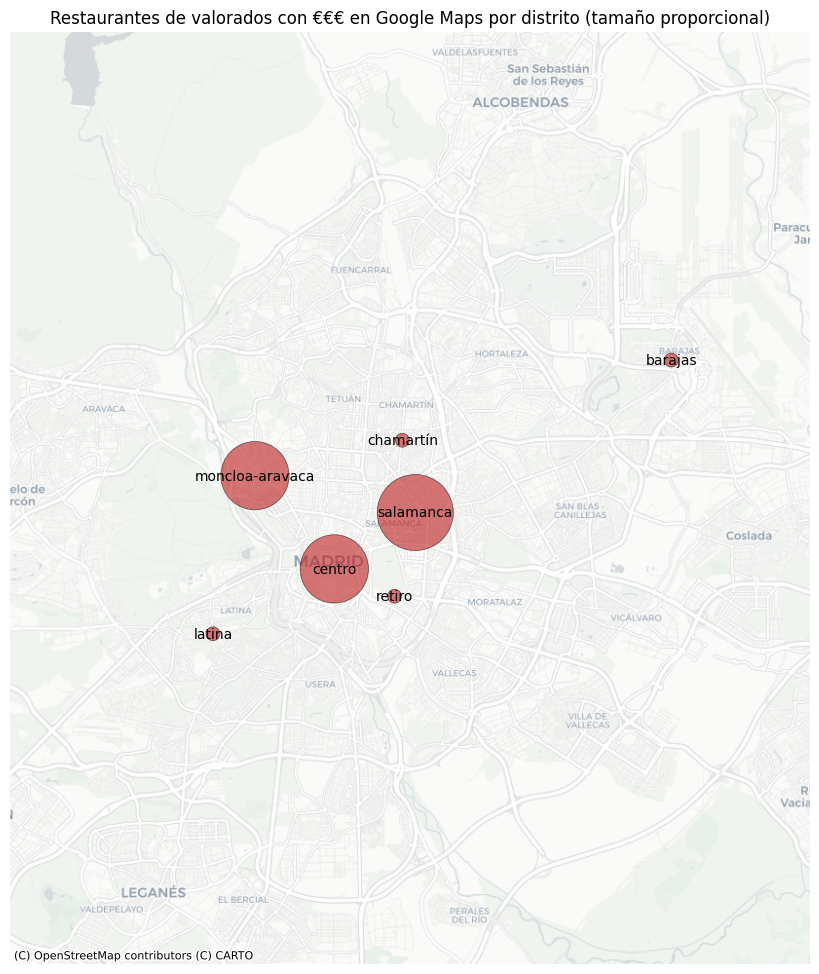

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx

# 1. Contar restaurantes por distrito
conteo = gdf_comb2_precio.groupby('distrito').size().reset_index(name='n_restaurantes')

# 2. Obtener una geometría representativa para cada distrito (1 punto por distrito)
# Vamos a tomar el primer punto de cada distrito como referencia (aproximado)
gdf_centros = gdf_comb2_precio.drop_duplicates(subset='distrito')[['distrito', 'geometry']]
gdf_centros = gdf_centros.merge(conteo, on='distrito')

# 3. Escalar los tamaños
tamaño_min = 100
tamaño_max = 3000

n = gdf_centros["n_restaurantes"]
norm = (n - n.min()) / (n.max() - n.min())
gdf_centros["tamaño"] = tamaño_min + norm * (tamaño_max - tamaño_min)

# 4. Crear el gráfico
ax = gdf_centros.plot(
    figsize=(10, 10),
    alpha=0.6,
    color="#be1d1d",
    markersize=gdf_centros["tamaño"],
    edgecolor="black",
    linewidth=0.5
)

# 5. Ajustar vista a Madrid
ax.set_xlim([-424778.23404063, -393382.69786466])
ax.set_ylim([4910895.19804772, 4947506.19846259])

# 6. Añadir etiquetas
for x, y, label in zip(gdf_centros.geometry.x,
                       gdf_centros.geometry.y,
                       gdf_centros["distrito"]):
    ax.text(x, y, label, fontsize=10, ha='center', va='center', color="black")

# 7. Añadir mapa base
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.axis('off')
plt.title("Restaurantes de valorados con €€€ en Google Maps por distrito (tamaño proporcional)")
plt.tight_layout()

# Guardar imagen del gráfico.
plt.savefig("img/export_by_vsc/Restaurantes_3estrellas_por_distrito.png", dpi=150, bbox_inches='tight')

plt.show()


---
---
## **GUARDAR CSV**

In [10]:
# Guardamos el DataFrame
nombre_archivo = "data/export_by_vsc/Madrid_restaurantes_by_google_maps.csv"
df_total.to_csv(nombre_archivo, index=False)